In [36]:
# Passive aggressive classifier is done by Emre Korkmaz, i guess name is not showing in contributors due to repository conflicts.

In [2]:
import numpy as np # importing this for linear algebra calculations
import pandas as pd

In [3]:
real = pd.read_csv("True.csv")
fake = pd.read_csv("Fake.csv")

In [4]:
# i am reading files from current directory.......

In [5]:
real.head() # display head of realnews..

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


In [6]:
fake.head() #display head of fake news...

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [7]:
#As this is a supervised learning problem, we are creating a target column named ‘label’ in both real and fake news data and concatenating them. with this thing we can check if data is balanced or not.

In [8]:
real['label'] = 1
fake['label'] = 0
data = pd.concat([real, fake]) # concatinating both files into one dataset.



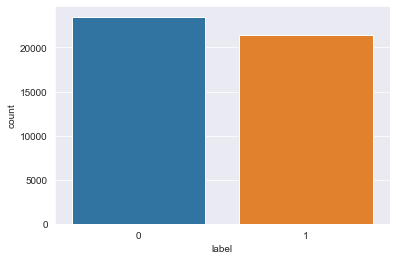

In [9]:
import seaborn as sns
sns.set_style("darkgrid")
sns.countplot(data['label']);

In [10]:
# it is seen that data is balanced.

In [11]:
data.isnull().sum()

title      0
text       0
subject    0
date       0
label      0
dtype: int64

In [12]:
# luckily there are no null values. So we dont need normalization here or anything.

In [13]:
data.columns # displaying all columns in data, from fake and real news.

Index(['title', 'text', 'subject', 'date', 'label'], dtype='object')

In [14]:
data.count()

title      44898
text       44898
subject    44898
date       44898
label      44898
dtype: int64

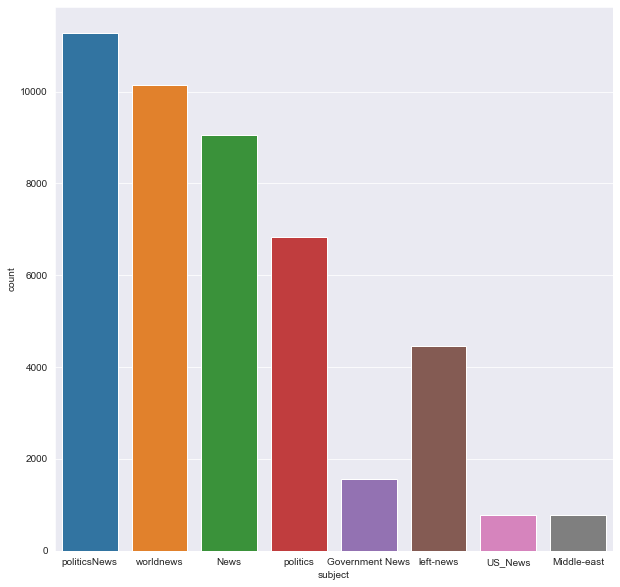

In [15]:
import matplotlib.pyplot as plt
data['subject'].value_counts()
plt.figure(figsize = (10,10))
sns.set_style("darkgrid")
sns.countplot(data['subject']);

In [16]:
#There are news about 8 subjects. We have the largest number of news from politicsNews. We can dig more into this.

[Text(0, 0, '0'), Text(0, 0, '1')]

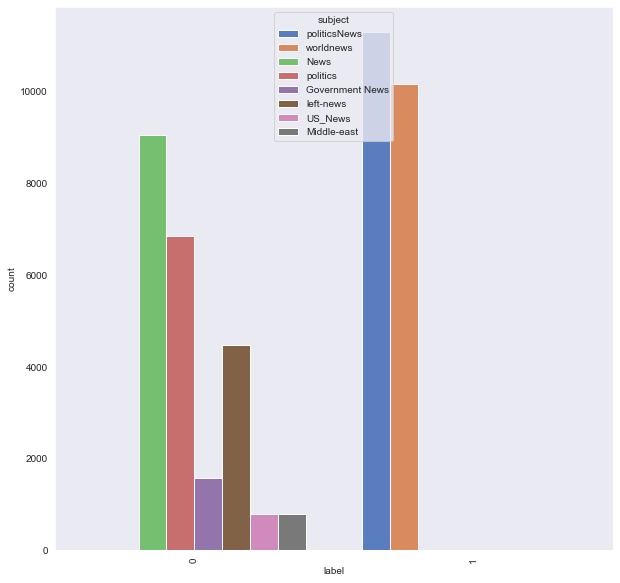

In [17]:
plt.figure(figsize = (10,10))
sns.set_style("dark")
chart = sns.countplot(x = "label", hue = "subject" , data = data , palette = 'muted')
chart.set_xticklabels(chart.get_xticklabels(),rotation=90)

In [18]:
data['text'] = data['title'] + " " + data['text']
data = data.drop(['title', 'subject', 'date'], axis=1)

In [19]:
#It is seen from the plot that all our real news belongs to 2 subjects.
#maybe this is because data is taken only from a small period of time.
#so now i concatenated title and text fields into one column and droped all other columns.

In [20]:
import nltk


In [21]:
from nltk.corpus import stopwords


In [22]:
# i am using wordcloud libaray to genenrate fakenews wordcloud. and displying it.

from wordcloud import WordCloud


In [23]:
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stopwords.words('english'), 
                min_font_size = 10).generate(" ".join(data[data['label'] == 0].text)) 

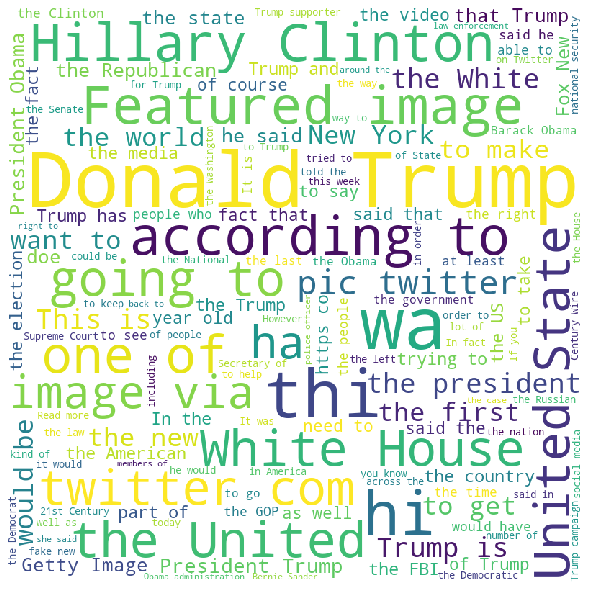

In [24]:
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
plt.show()

In [25]:
#similarly i am generating wordcloud for Real news.
#words which are used in real news, i saw this thing on internet.
#i had to install some additional libraries to get it done. generating wordcloud takes time and a lot of memory :P

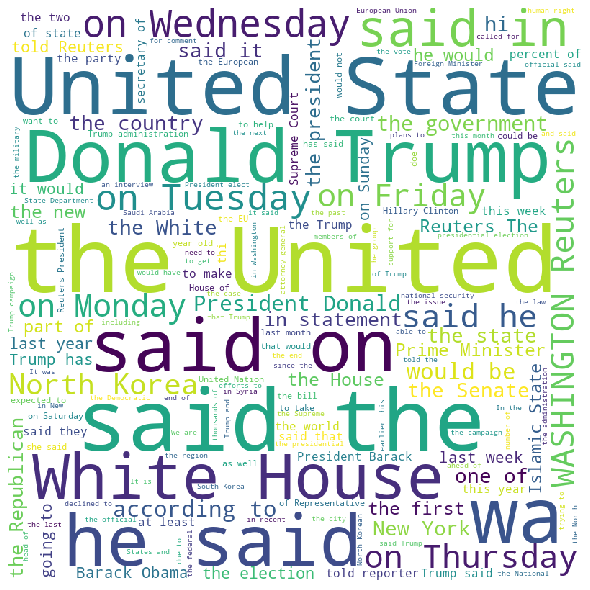

In [26]:
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stopwords.words('english'), 
                min_font_size = 10).generate(" ".join(data[data['label'] == 1].text)) 
  
# plot the WordCloud image for genuine news data                     
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
plt.show() 


In [27]:
#<h1>Classification BY  ABDUL KHALIQ</h1>
#splitting data for training and testing
#scikit-learn is a Python module for machine learning built on top of SciPy and is distributed under the 3-Clause BSD license.
import sklearn
from sklearn.model_selection import train_test_split #obtain trainning test split is a function for splitting data arrays into two subsets
x_train,x_test,y_train,y_test = train_test_split(data['text'],data['label'],test_size=0.2, random_state = 1)

In [ ]:
# We use Pipeline object, a utility used to automate machine learning workflow. A pipeline allows several transformers to be chained together. Data flows from the start of the pipeline to the end, and the output of each transformer is given as the input of the next transformer. A pipeline has two main methods:
# fit_transform: this method is called for each transformer and each time the result is fed into the next transformer.
# fit_predict: if your pipeline ends with an estimator, fit_predict is called on the estimator.
# There are several metrics to evaluate the performance of a model. In this project, we use accuracy and confusion matrix. Accuracy is the ratio of number of correct predictions to the total number of predictions. Accuracy is considered as a good metrics only if your data is balanced. Confusion matrix is a matrix which gives more insights into our model. It compares predicted values and the actual values. We use 4 measures to evaluate the performance.

accuracy:   93.909


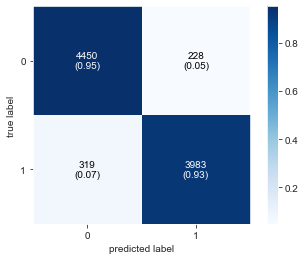

In [31]:
#training for ture news
#Multinomial NB
import mlxtend#MLxtend is to make commonly used tools. accessible to researchers in academia and data scientists
# from sklearn import function TfidfTransformer for term frequency–inverse document frequency
from sklearn.feature_extraction.text import TfidfTransformer 
#from sklearn import function CountVectorizer is provides a simple way to both tokenize a collection of text documents and build a vocabulary of known words, but also to encode new documents 
#using that vocabulary.Call the fit() function in order to learn a vocabulary from one or more documents
from sklearn.feature_extraction.text import CountVectorizer
# from different file of sklearn import functions for machine learning 
from sklearn.feature_extraction.text import TfidfVectorizer 
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
import sklearn.metrics as metrics                                                 
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import confusion_matrix
# building the pipeline
pipe = Pipeline([('vect', CountVectorizer()),('tfidf', TfidfTransformer()),('clf', MultinomialNB())])
# fit the pipline in model variable
model = pipe.fit(x_train, y_train)
#chck the model prediction
prediction = model.predict(x_test)
#finding accuracy of model 
score = metrics.accuracy_score(y_test, prediction)
print("accuracy:   %0.3f" % (score*100))
cm = metrics.confusion_matrix(y_test, prediction, labels=[0,1])
fig, ax = plot_confusion_matrix(conf_mat=confusion_matrix(y_test, prediction),show_absolute=True,show_normed=True,colorbar=True)
#print graph
plt.show()

accuracy:   99.677


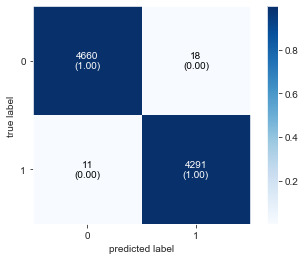

In [32]:
#training for fake news
#SVM
#same find Accuracy ,fake label and prediction labael
from sklearn.svm import LinearSVC
pipe = Pipeline([('vect', CountVectorizer()),('tfidf', TfidfTransformer()),('clf', LinearSVC())])
model = pipe.fit(x_train, y_train)
prediction = model.predict(x_test)
score = metrics.accuracy_score(y_test, prediction)
print("accuracy:   %0.3f" % (score*100))
cm = metrics.confusion_matrix(y_test, prediction, labels=[0,1])
fig, ax = plot_confusion_matrix(conf_mat=confusion_matrix(y_test, prediction),show_absolute=True,show_normed=True,colorbar=True)
plt.show()

accuracy:   99.644


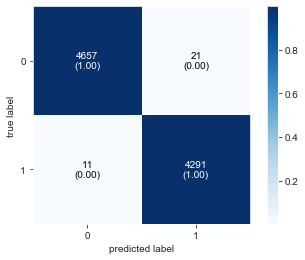

In [33]:
#EMRE KORKMAZ
#Passive Aggressive Classifier is Done by EMRE KORKMAZ.
from sklearn.linear_model import PassiveAggressiveClassifier
pipe = Pipeline([('vect', CountVectorizer()),('tfidf', TfidfTransformer()),('clf',  PassiveAggressiveClassifier())])
model = pipe.fit(x_train, y_train)
prediction = model.predict(x_test)
score = metrics.accuracy_score(y_test, prediction)
print("accuracy:   %0.3f" % (score*100))
cm = metrics.confusion_matrix(y_test, prediction, labels=[0,1])
fig, ax = plot_confusion_matrix(conf_mat=confusion_matrix(y_test, prediction),show_absolute=True,show_normed=True,colorbar=True)
plt.show()

In [35]:
# Passive aggressive classifier is an online algorithm that learns from massive streams of data. The idea is to get an example, update the classifier, and throw away the example. It is fast and easy to implement, but does not provide global guarantees like SVM.
# Now we can apply these models to our data. But, we cannot give the text directly as an input to the classifier. Instead, we will convert the text to numbers. Machine learning uses a simple model called bag-of-words to deal with text data. 